Prepare illustrations for documentation

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.colors import LogNorm

import scipy.ndimage as ndimage

In [2]:
# some custom commands for output plots

plt.rcParams['axes.titlesize'] = 'medium'
plt.rcParams['axes.labelsize'] = 'medium'

In [3]:
import os
import sys

In [4]:
COSMICS_ROOT = os.path.abspath('..')

# SM

In [4]:
os.chdir(COSMICS_ROOT+'/analysis/sm_sif/')
from sm_process_funcs import *

## Removal of bright stars

In [5]:
#sourcefile=("../../datasets/sif_fits/2016-01-29/SIF_PROCESSING_CCD_ROW_3_SM2_OBMT_START_71037995998161500_CDP_NONE.fits")
#sourcefile=("../../datasets/sif_fits/2015-04-03/SIF_PROCESSING_CCD_ROW_3_SM1_OBMT_START_45028212999616700_CDP_NONE.fits")
#sourcefile=("../../datasets/sif_fits/2015-07-03/SIF_PROCESSING_CCD_ROW_2_SM1_OBMT_START_52911899999459900_CDP_NONE.fits")
sourcefile=("../../datasets/sif_fits/2015-07-03/SIF_PROCESSING_CCD_ROW_7_SM1_OBMT_START_52953386000234300_CDP_NONE.fits") #[900:1100,700:]

sourcefile=("../../datasets/sif_fits/2015-07-03/SIF_PROCESSING_CCD_ROW_2_SM2_OBMT_START_52917673000075100_CDP_NONE.fits") #[1000:1250,500:800]

sourcefile=("../../datasets/sif_fits/2015-01-20/SIF_PROCESSING_CCD_ROW_7_SM1_OBMT_START_38762139998865500_CDP_NONE.fits")

image, fov, row, acqTime = sm_image_data(sourcefile)

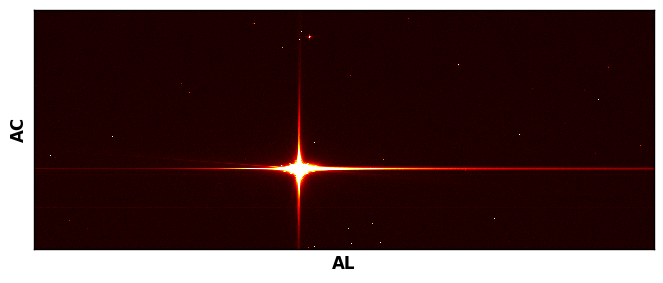

In [53]:
plt.imshow(np.rot90(image),origin='lower',norm=LogNorm(),cmap='hot',vmax=2000)
plt.grid(False)
plt.tick_params(axis='both',left=False, bottom=False,labelleft=False,labelbottom=False)

plt.xlabel('AL')
plt.ylabel('AC')

plt.savefig(COSMICS_ROOT+"/docs/cat_documentation/images/SM_full_image.pdf",bbox_inches='tight')

In [54]:
smask = sm_starmask(image,2000, badcol=-1)
brightrem = (1-smask) * image +1

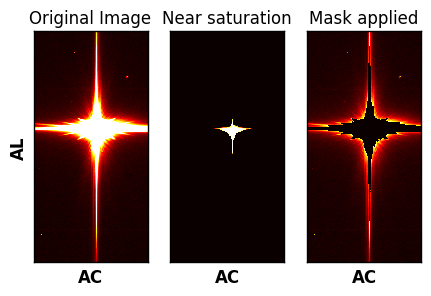

In [55]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,sharey=True)

minshow = np.min(image[950:1200,450:-50])
ax1.imshow(np.rot90(image[950:1200,450:-50]),origin='lower',norm=LogNorm(),cmap='hot',vmax=2000)
badlim = 40000
badmask = image * (image > badlim)
ax2.imshow(np.rot90(badmask[950:1200,450:-50]),origin='lower',cmap='hot',vmin=badlim)
ax3.imshow(np.rot90(brightrem[950:1200,450:-50]),origin='lower',norm=LogNorm(),cmap='hot',vmin=minshow,vmax=2000)

titles = ['Original Image', 'Near saturation', 'Mask applied']

for ii in range(3):
    ax = [ax1,ax2,ax3][ii]
    ax.grid(False)
    ax.tick_params(axis='both',left=False, bottom=False,labelleft=False,labelbottom=False)
    ax.set_title(titles[ii])
    ax.set_xlabel('AC')
    
ax1.set_ylabel('AL')
    
fig.set_size_inches(5,3)

fig.savefig(COSMICS_ROOT+"/docs/cat_documentation/images/SM_starmask.pdf",bbox_inches='tight')

# BAM-OBS

In [44]:
os.chdir(COSMICS_ROOT+'/analysis/bam')
from bam_processor import *

## Images of BamObservations

In [45]:
reader = gbin_reader.GbinReader('../../datasets/gbins/bam/2017-07-02/BamObs_0.gbin')
obslist = []
while len(obslist)<3:
    obs = reader.__next__()
    if obs.fov==0:
        obslist.append(obs)
reader.close()

In [46]:
images = [np.reshape(obs.samples,(1000,80)) for obs in obslist]

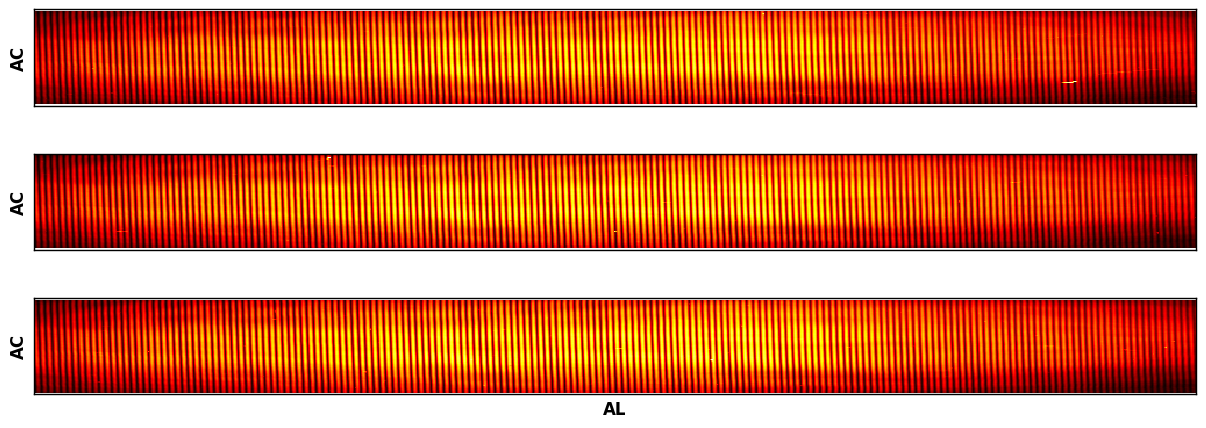

In [47]:
fig, axes = plt.subplots(nrows=3,sharex=True)

for ii in range(len(axes)):
    ax = axes[ii]
    ax.imshow(np.rot90(images[ii]),origin='lower',cmap='hot',norm=LogNorm(),aspect=1)
    ax.grid(False)
    ax.tick_params(axis='both',left=False, bottom=False,labelleft=False,labelbottom=False)
    ax.set_ylabel('AC')

axes[-1].set_xlabel('AL')
fig.set_size_inches(15,5)

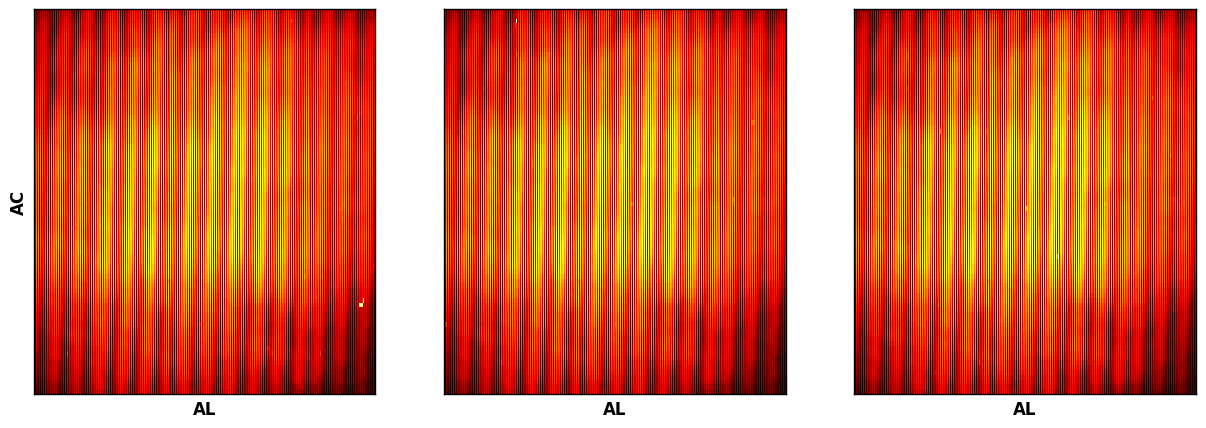

In [48]:
fig, axes = plt.subplots(ncols=3,sharey=True)

for ii in range(len(axes)):
    ax = axes[ii]
    ax.imshow(np.rot90(images[ii]),origin='lower',cmap='hot',norm=LogNorm(),aspect=12)
    ax.grid(False)
    ax.tick_params(axis='both',left=False, bottom=False,labelleft=False,labelbottom=False)
    ax.set_xlabel('AL')
    
axes[0].set_ylabel('AC')
    
fig.set_size_inches(15,5)

fig.savefig(COSMICS_ROOT+"/docs/cat_documentation/images/BAM-OBS_patterns.pdf",bbox_inches='tight')

## Sharpness of the fringes

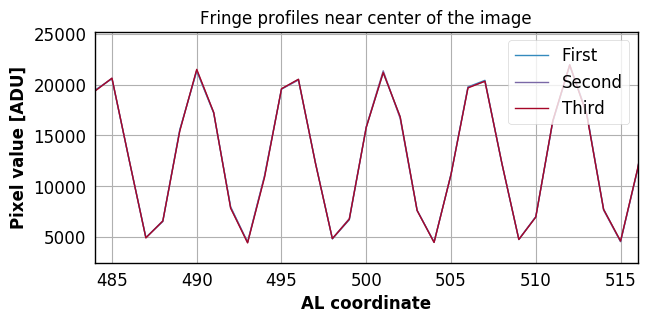

In [73]:
plt.plot(images[0][:,40],label='First')
plt.plot(images[1][:,40],label='Second')
plt.plot(images[2][:,40],label='Third')
plt.xlabel('AL coordinate')
plt.ylabel('Pixel value [ADU]')
plt.title('Fringe profiles near center of the image')
plt.xlim((484,516))
plt.legend(loc='upper right')

plt.gcf().set_size_inches(7,3)

plt.savefig(COSMICS_ROOT+"/docs/cat_documentation/images/BAM-OBS_fringes.pdf",bbox_inches='tight')

## Connection algorithm

In [23]:
import scipy.ndimage as ndimage

testarr = np.array([[0,0,0,0,0,0,0,0,0,0,0],
                    [0,1,1,1,0,1,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,1,1,1,0],
                    [0,0,0,0,1,1,0,0,0,0,0],
                    [0,1,1,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,1,1,1,0],
                    [0,0,0,0,0,0,0,0,0,0,0],
                   ])

dilated = ndimage.binary_dilation(testarr, structure=(np.ones((3,3))))
final = ndimage.binary_erosion(dilated, structure=(np.array([[0,1,0],[1,1,1],[0,1,0]])))

In [24]:
dilated = ndimage.binary_dilation(testarr, structure=(np.ones((3,3))))
final = ndimage.binary_erosion(dilated, structure=(np.array([[0,1,0],[1,1,1],[0,1,0]])))

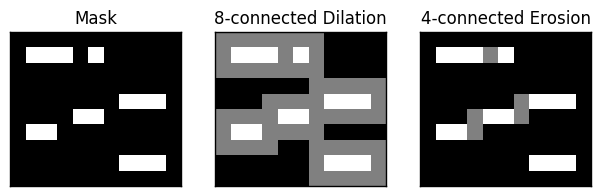

In [29]:
fig, axes = plt.subplots(ncols=3,sharey=True)


axes[0].imshow(testarr,cmap='gray')
axes[1].imshow(testarr+dilated,cmap='gray')
axes[2].imshow(testarr+final,cmap='gray')

titles = ['Mask', '8-connected Dilation', '4-connected Erosion']

for ii in range(len(axes)):
    ax = axes[ii]
    ax.grid(False)
    ax.tick_params(axis='both',left=False, bottom=False,labelleft=False,labelbottom=False)
    ax.set_title(titles[ii])
    
fig.set_size_inches(7.5,2)
fig.savefig(COSMICS_ROOT+"/docs/cat_documentation/images/BAM-OBS_connection.pdf",bbox_inches='tight')

# BAM-SIF

In [30]:
os.chdir(COSMICS_ROOT+'/analysis/bam_sif')
from extraction_bam_sif import *

## Total Image

In [31]:
sourcefile = COSMICS_ROOT+'/datasets/sif_fits/2014-07-27/SIF_PROCESSING_CCD_ROW_1_BAM_WFS_OBMT_START_23428006783628300_CDP_IPHI_CLOCKING_VIG_7.989_VID_12.504.fits'
rawimg = fits.getdata(sourcefile)[:,2:]

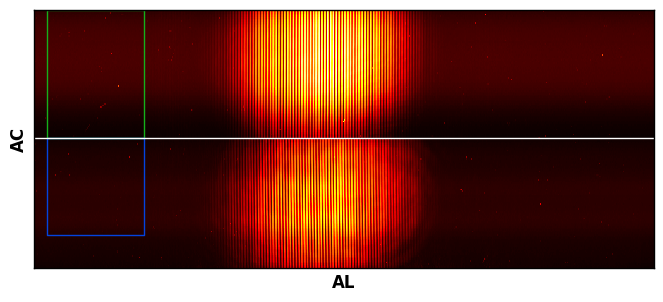

In [32]:
plt.imshow(np.rot90(rawimg),origin='lower',cmap='hot',norm=LogNorm(),aspect=12)

# draw two boxes around the extraction regions
N_AL = 721
imlen = rawimg.shape[0]
imheight = rawimg.shape[1]
box_1 = ([99+N_AL,99+N_AL,99,99, 99+N_AL],[imheight-1,imheight-80,imheight-80,imheight-1, imheight-1])
box_2 = ([99+N_AL,99+N_AL,99,99, 99+N_AL],[imheight-80,imheight-140,imheight-140,imheight-80, imheight-80])

plt.plot(box_1[0],box_1[1], color='xkcd:green',linewidth=1)
plt.plot(box_2[0],box_2[1], color='xkcd:blue',linewidth=1)
plt.plot([0,imlen-1],[80,80],color='xkcd:white')

plt.grid(False)
plt.tick_params(axis='both',left=False, bottom=False,labelleft=False,labelbottom=False)

plt.xlabel('AL')
plt.ylabel('AC')

plt.savefig(COSMICS_ROOT+"/docs/cat_documentation/images/BAM-SIF_full_image.pdf",bbox_inches='tight')

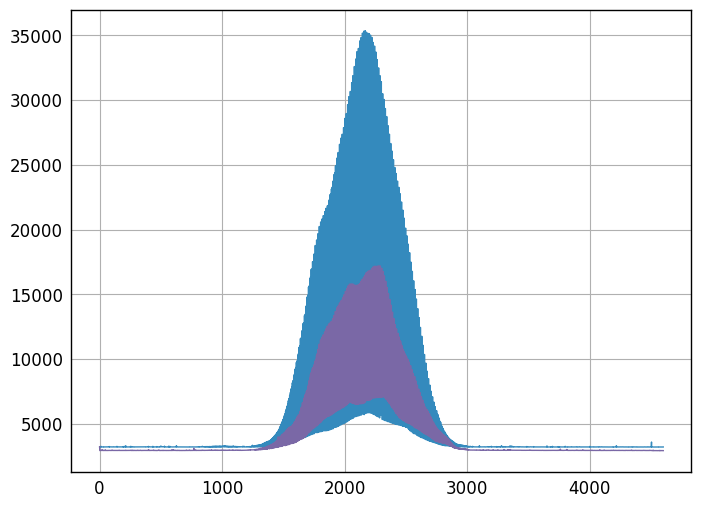

In [33]:
plt.plot(np.mean(rawimg[:,0:80],axis=1))
plt.plot(np.mean(rawimg[:,81:],axis=1))

--> It seems that what we assumed to be FOV 1 in BAM-SIF is actually FOV 2!

## Background removal

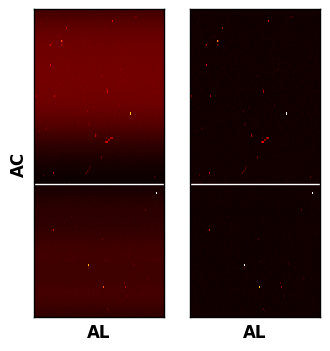

In [48]:
myregion = rawimg[99:99+N_AL,:140]

import scipy
# Get the background
bkg_src = np.copy(myregion[-99:]).astype("float64") # last pixels of the image area
    
# determine the background using outlier rejection
# throw away highest and lowest 25%
bkg_src = scipy.stats.trimboth(bkg_src,0.25,axis=0)

background = np.mean(bkg_src, axis=0)


fig, axes = plt.subplots(ncols=2,sharey=True)

axes[0].imshow(np.rot90(myregion),origin='lower',cmap='hot',norm=LogNorm(),aspect=12)
axes[0].plot([0,N_AL-1],[60,60],color='w')

axes[1].imshow(np.rot90(myregion-background),origin='lower',cmap='hot',aspect=12,vmax=5000)
axes[1].plot([0,N_AL-1],[60,60],color='w')


for ii in range(len(axes)):
    ax = axes[ii]
    ax.grid(False)
    ax.tick_params(axis='both',left=False, bottom=False,labelleft=False,labelbottom=False)
    ax.set_xlabel('AL')
    
axes[0].set_ylabel('AC')
    
fig.set_size_inches(3.7,4)

fig.savefig(COSMICS_ROOT+"/docs/cat_documentation/images/BAM-SIF_background.pdf",bbox_inches='tight')

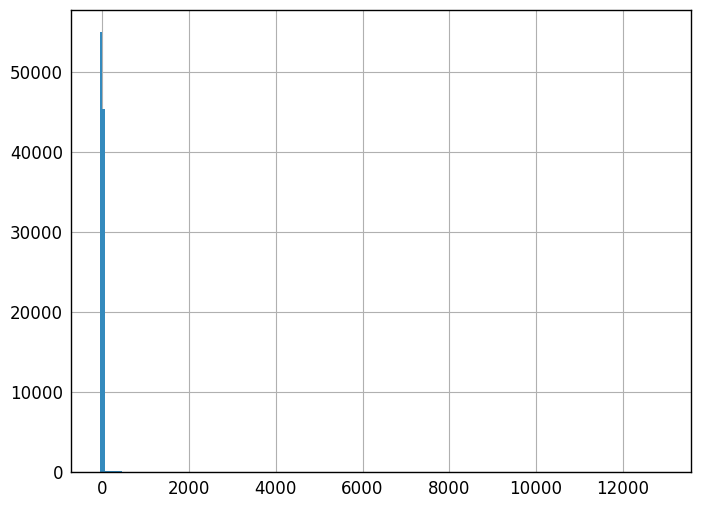

In [44]:
test = plt.hist((myregion-background).flatten(),200)

# TrackObs demonstration

In [35]:
testarr = np.array([[0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,1,0,0,0,0,0,0,0,0],
                    [0,1,0,0,0,1,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,1,1,1,0,0,0,0,0],
                    [0,0,0,0,0,0,1,1,1,1,1],
                    [0,0,1,0,0,0,0,0,0,0,1],
                    [0,0,0,1,0,0,0,0,0,0,0],
                    [0,0,0,0,1,0,0,0,0,0,0],
                    [0,0,1,0,0,1,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0],
                   ])

In [36]:
testlab = ndimage.measurements.label(testarr,structure = np.ones((3,3)))[0]

In [37]:
testobj = ndimage.measurements.find_objects(testlab)

In [38]:
print(testobj)

[(slice(1, 3, None), slice(1, 3, None)), (slice(2, 3, None), slice(5, 6, None)), (slice(4, 7, None), slice(3, 11, None)), (slice(6, 10, None), slice(2, 6, None)), (slice(9, 10, None), slice(2, 3, None))]


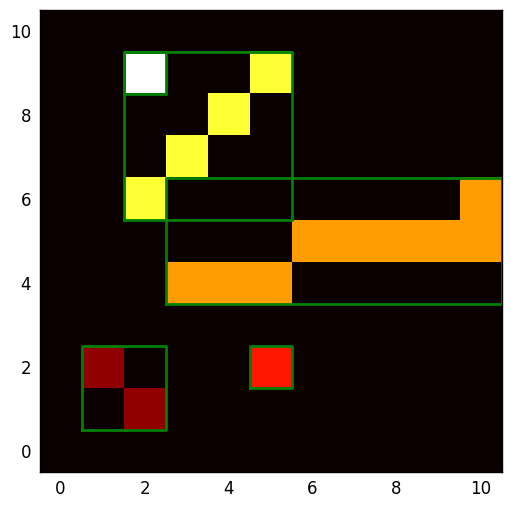

In [39]:
plt.imshow(testlab,cmap='hot',origin='lower')
for s in testobj:
    xcorners = np.array([s[0].start,s[0].start,s[0].stop,s[0].stop,s[0].start])-0.5
    ycorners = np.array([s[1].start,s[1].stop,s[1].stop,s[1].start,s[1].start])-0.5
    plt.plot(ycorners, xcorners,color='g',linewidth=2)
    
plt.grid(False)

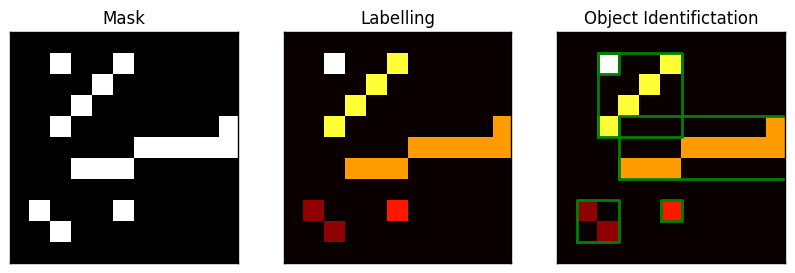

In [43]:
fig, axes = plt.subplots(ncols=3,sharey=True)


axes[0].imshow(testarr,cmap='gray',origin='lower')
axes[1].imshow(testlab,cmap='hot',origin='lower')
axes[2].imshow(testlab,cmap='hot',origin='lower')
for s in testobj:
    xcorners = np.array([s[0].start,s[0].start,s[0].stop,s[0].stop,s[0].start])-0.5
    ycorners = np.array([s[1].start,s[1].stop,s[1].stop,s[1].start,s[1].start])-0.5
    axes[2].plot(ycorners, xcorners,color='g',linewidth=2)

titles = ['Mask', 'Labelling', 'Object Identifictation']

for ii in range(len(axes)):
    ax = axes[ii]
    ax.grid(False)
    ax.tick_params(axis='both',left=False, bottom=False,labelleft=False,labelbottom=False)
    ax.set_title(titles[ii])
    
fig.set_size_inches(10,3)
fig.savefig(COSMICS_ROOT+"/docs/cat_documentation/images/TrackObs_Objects.pdf",bbox_inches='tight')